In [9]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anjil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df = pd.read_csv('sampled_reviews.csv')
df = df.head(500)
print(df.shape)

(500, 10)


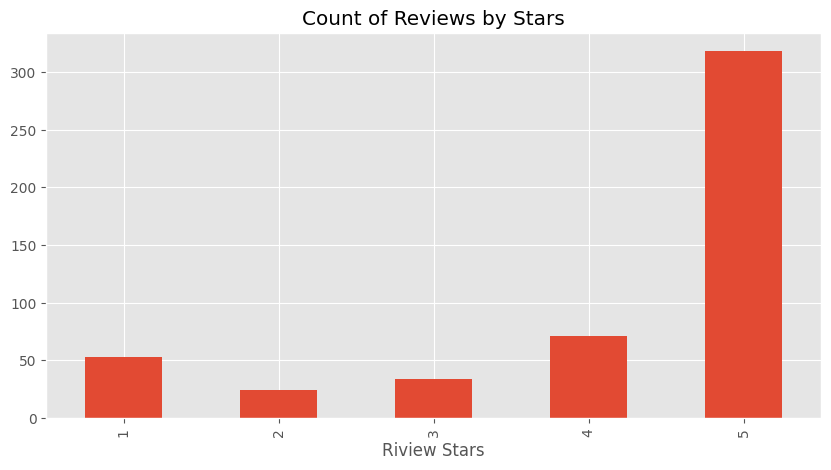

In [12]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10,5))
ax.set_xlabel('Riview Stars')
plt.show()

In [13]:
example = df['Text'][50]
print(example)

I paid a much higher price for these plants, thinking I would get the best.  What was received was a can telling how to sow the seeds til they sprouted.  And, they have not sprouted yet.  This company advertised PLANTS, and send SEEDS


In [14]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'paid', 'a', 'much', 'higher', 'price', 'for', 'these', 'plants', ',']

In [15]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Anjil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Anjil\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Anjil\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [16]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('paid', 'VBD'),
 ('a', 'DT'),
 ('much', 'RB'),
 ('higher', 'JJR'),
 ('price', 'NN'),
 ('for', 'IN'),
 ('these', 'DT'),
 ('plants', 'NNS'),
 (',', ',')]

In [17]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  paid/VBD
  a/DT
  much/RB
  higher/JJR
  price/NN
  for/IN
  these/DT
  plants/NNS
  ,/,
  thinking/VBG
  I/PRP
  would/MD
  get/VB
  the/DT
  best/JJS
  ./.
  What/WP
  was/VBD
  received/VBN
  was/VBD
  a/DT
  can/MD
  telling/VB
  how/WRB
  to/TO
  sow/VB
  the/DT
  seeds/NNS
  til/VBP
  they/PRP
  sprouted/VBD
  ./.
  And/CC
  ,/,
  they/PRP
  have/VBP
  not/RB
  sprouted/VBN
  yet/RB
  ./.
  This/DT
  company/NN
  advertised/VBD
  (ORGANIZATION PLANTS/NNP)
  ,/,
  and/CC
  send/VBP
  (ORGANIZATION SEEDS/NNP))


In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Anjil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [20]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [21]:
sia.polarity_scores('this is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [22]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.6369}

In [23]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [24]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index' : 'Id'})
vaders = vaders.merge(df, how="left")

In [25]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,288313,0.101,0.697,0.202,0.7351,B000ENUC3S,AN66F3Q4QNU43,Donna Speaker,0,0,5,1340496000,Cherry Pie Larabar,I love the Cherry Pie Lara bar. Best and tast...
1,431727,0.026,0.879,0.096,0.7522,B002TMV3CG,A3G007LQX6KGOD,SevereWX,0,0,5,1287878400,Melitta Coffee,Melitta Cafe COllection Blanc et Noir coffee h...
2,110312,0.000,0.602,0.398,0.9595,B004867T24,A11LNY2OLQSUSV,M. Castillo,0,0,5,1331769600,great treat,my girls absolutely loved this tuna. they were...
3,91856,0.000,0.553,0.447,0.9390,B004U7KPY0,A1QCYVHWO5934U,"PistolaMia ""PistolaMia""",0,0,5,1332806400,Daily Calming,The vendor is fast and dependable. The tea is ...
4,338856,0.047,0.784,0.169,0.9874,B000FD78R0,A30U2QQN2FFHE9,J. Amicucci,2,3,5,1271376000,Best Canned Artichokes Out There!,UPDATE - 8/9/2010<br />A lot can happen in jus...


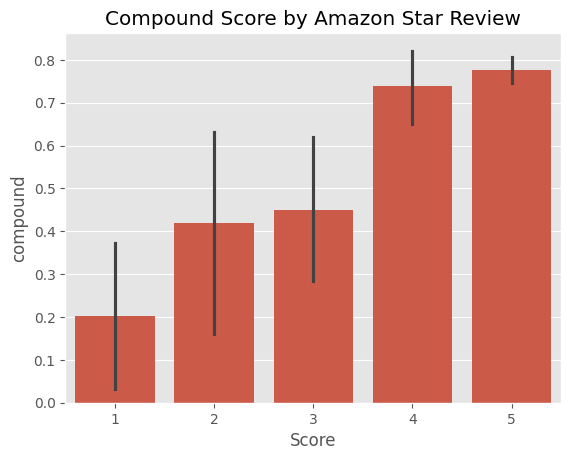

In [26]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

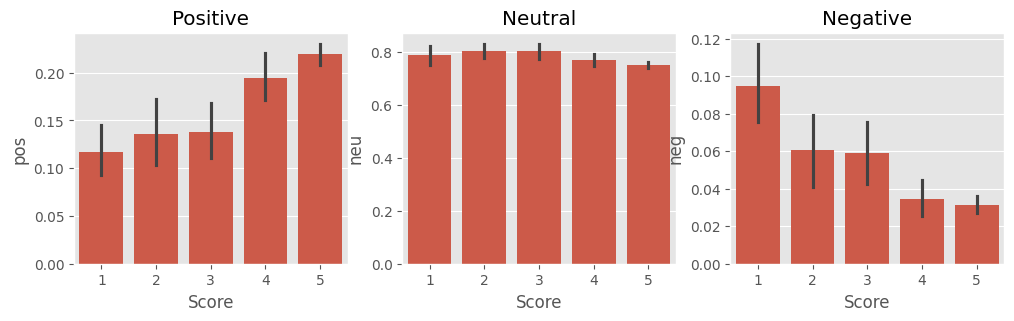

In [27]:
fig, axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [28]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [29]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\Anjil\Documents\gitit\DSenv\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

c:\Users\Anjil\Documents\gitit\DSenv\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Anjil\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [30]:
print(example)
sia.polarity_scores(example)

I paid a much higher price for these plants, thinking I would get the best.  What was received was a can telling how to sow the seeds til they sprouted.  And, they have not sprouted yet.  This company advertised PLANTS, and send SEEDS


{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.6369}

In [37]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [46]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"] =  value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 284349
Broke for id 412082
Broke for id 100123
Broke for id 379250
Broke for id 524975
Broke for id 128752
Broke for id 351902


In [44]:
both

{'vader_neg': 0.101,
 'vader_neu': 0.697,
 'vader_pos': 0.202,
 'vader_compound': 0.7351,
 'roberta_neg': 0.0027660881,
 'roberta_neu': 0.017453445,
 'roberta_pos': 0.9797805}

In [47]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index' : 'Id'})
results_df = results_df.merge(df, how="left")

In [48]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,288313,0.101,0.697,0.202,0.7351,0.002766,0.017453,0.979780,B000ENUC3S,AN66F3Q4QNU43,Donna Speaker,0,0,5,1340496000,Cherry Pie Larabar,I love the Cherry Pie Lara bar. Best and tast...
1,431727,0.026,0.879,0.096,0.7522,0.003404,0.084030,0.912566,B002TMV3CG,A3G007LQX6KGOD,SevereWX,0,0,5,1287878400,Melitta Coffee,Melitta Cafe COllection Blanc et Noir coffee h...
2,110312,0.000,0.602,0.398,0.9595,0.002480,0.014263,0.983257,B004867T24,A11LNY2OLQSUSV,M. Castillo,0,0,5,1331769600,great treat,my girls absolutely loved this tuna. they were...
3,91856,0.000,0.553,0.447,0.9390,0.001510,0.014252,0.984238,B004U7KPY0,A1QCYVHWO5934U,"PistolaMia ""PistolaMia""",0,0,5,1332806400,Daily Calming,The vendor is fast and dependable. The tea is ...
4,338856,0.047,0.784,0.169,0.9874,0.284239,0.319129,0.396632,B000FD78R0,A30U2QQN2FFHE9,J. Amicucci,2,3,5,1271376000,Best Canned Artichokes Out There!,UPDATE - 8/9/2010<br />A lot can happen in jus...


In [49]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

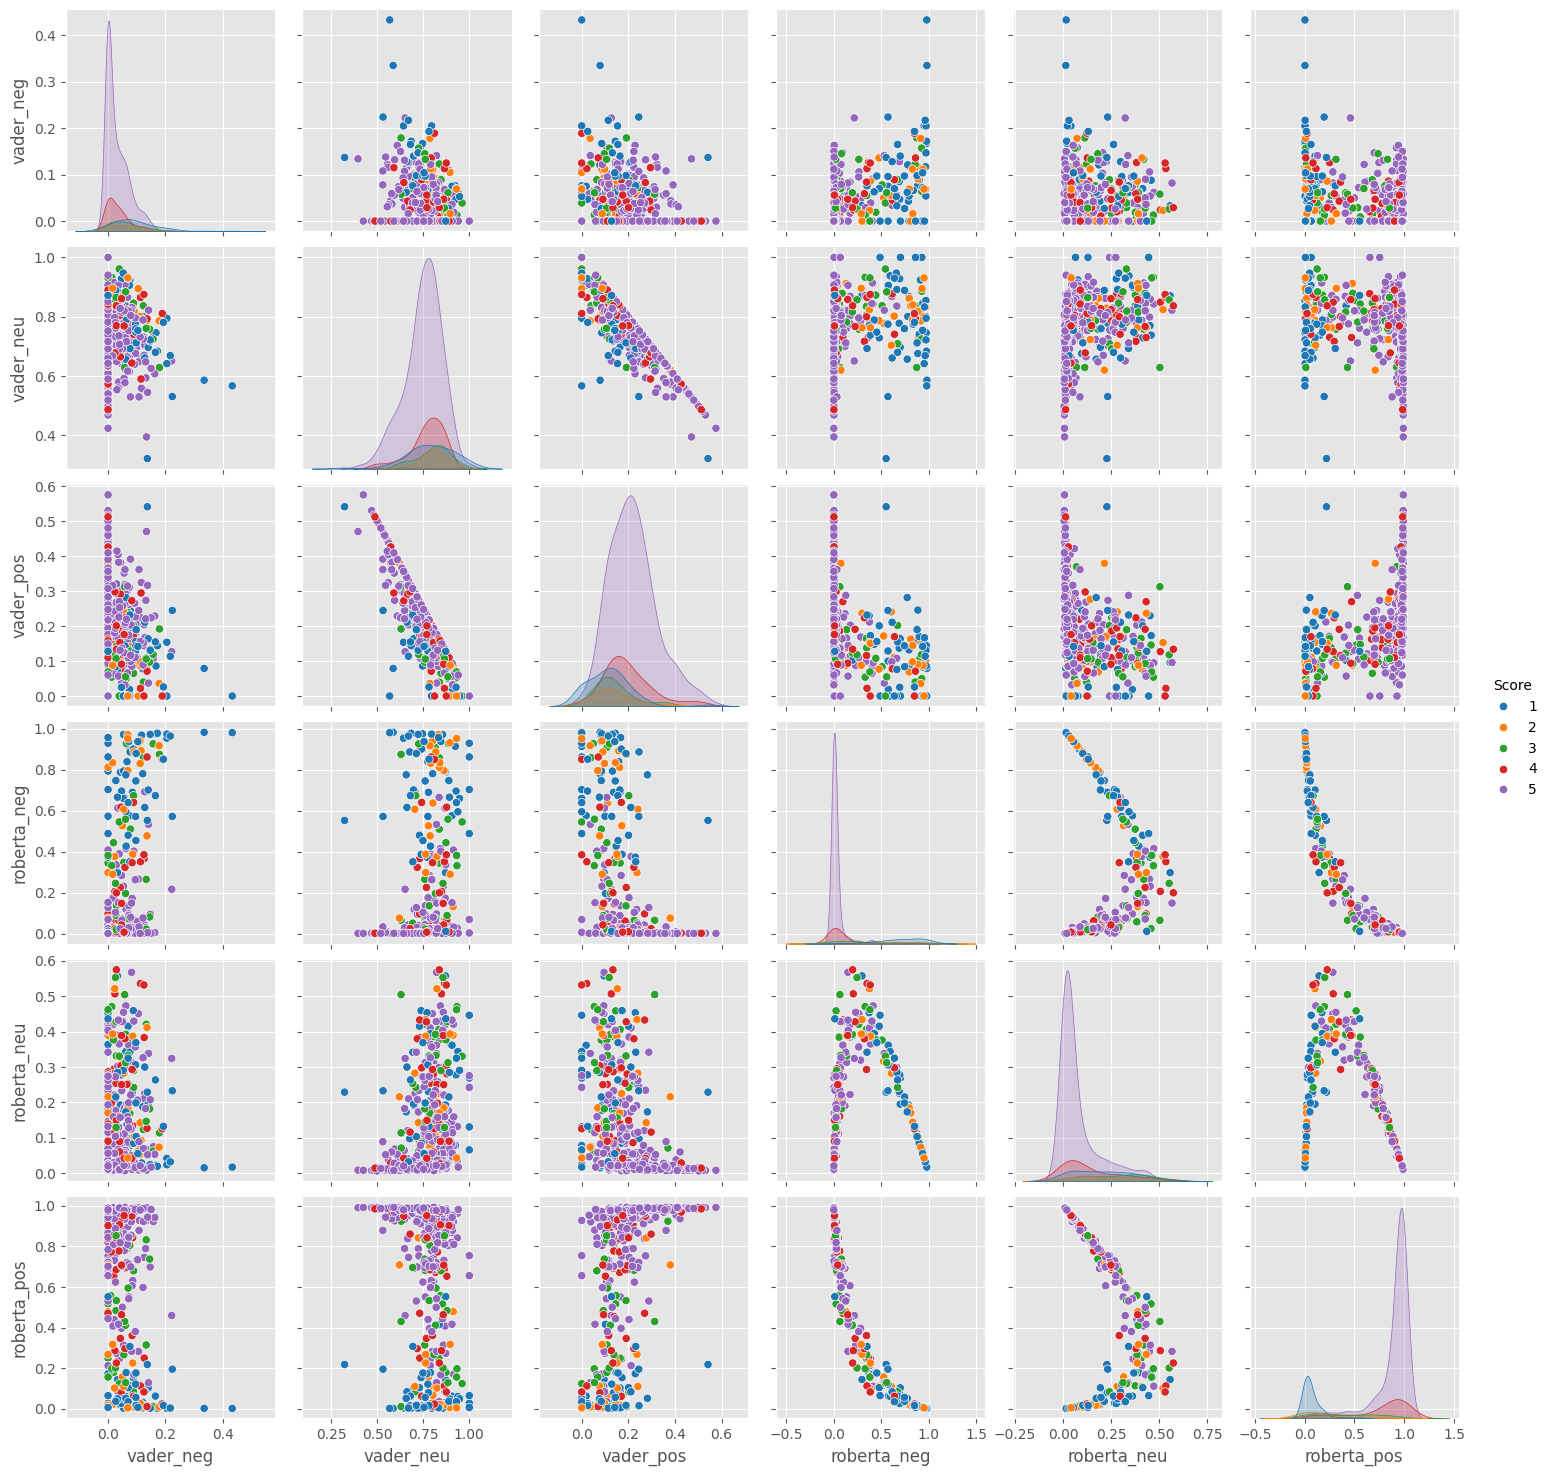

In [51]:
sns.pairplot(data = results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
                  hue='Score',
                  palette='tab10')
plt.show()

In [52]:
results_df.query('Score == 1') \
.sort_values('roberta_pos', ascending=False)['Text'].values[0]

'After I ordered the Sesame Seeds, I found Sesame seeds at a local oriental food store and saved almost $9.00 for same amount.'

In [53]:
results_df.query('Score == 1') \
.sort_values('vader_pos', ascending=False)['Text'].values[0]

'I love coffee, I love mochas, I love amaretto.<br />This product however was disgusting !!!'

In [54]:
results_df.query('Score == 5') \
.sort_values('roberta_neg', ascending=False)['Text'].values[0]

'one line was enough. see title.oh this is irritating.  Amazon, making me post a long review to have any review is irritating, but the tea was good.'

In [56]:
results_df.query('Score == 5') \
.sort_values('vader_neg', ascending=False)['Text'].values[0]

'I have always loved any of the Walker shortbread products.  My only complaint was they were not well packed for shipping and arrived somewhat broken.'

In [58]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\Anjil\Documents\gitit\DSenv\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

c:\Users\Anjil\Documents\gitit\DSenv\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Anjil\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [59]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [60]:
sent_pipeline('i love this product')

[{'label': 'POSITIVE', 'score': 0.9998788833618164}]

In [61]:
sent_pipeline('this has to be the worst experience')

[{'label': 'NEGATIVE', 'score': 0.9997979998588562}]